In [205]:
import pandas as pd
from matplotlib import pyplot as plt
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont

In [201]:
df = pd.read_csv('class_map_corrected.csv')
# df = pd.read_csv('class_map.csv')
graphemes_df = df.loc[df['component_type'] == 'grapheme_root'].reset_index()
vowel_df = df.loc[df['component_type'] == 'vowel_diacritic'].reset_index()
consonant_df = df.loc[df['component_type'] == 'consonant_diacritic'].reset_index()

In [52]:
g_v = graphemes_df.iloc[53]['component']
v_v = vowel_df.iloc[5]['component']
c_v = consonant_df.iloc[2]['component']

In [87]:
df_train = pd.read_csv('train.csv')

In [237]:
def generate_from_components(g_i, v_i, c_i):
    g_v = graphemes_df.iloc[g_i]['component']
    v_v = vowel_df.iloc[v_i]['component']
    c_v = consonant_df.iloc[c_i]['component']
    vowel_type1 = [2,4,5,6,7,8,9,10]
    vowel_type2 = [1,3]
    consonant_type1 = [1]
    consonant_type2 = [2,3]
    consonant_type3 = [5,4]

    a = 0

    if v_i in vowel_type1:
        if c_i == 0:
            a = g_v + v_v
        elif c_i in consonant_type3:
            a = g_v + c_v  + v_v 
        elif c_i in consonant_type1:
            a = g_v + v_v + c_v
        else:
            a = c_v + g_v + v_v
    elif v_i in vowel_type2:
        if c_i == 0:
            a = g_v + v_v
        else:
            if c_i in consonant_type1:
                a = g_v + v_v+ c_v
            elif c_i in consonant_type2:
                a = c_v + g_v + v_v
            else:
                a = g_v + c_v + v_v
    else:
        if c_i == 0:
            a = g_v
        else:
            if c_i in consonant_type2:
                a = c_v+g_v
            else:
                a = g_v+c_v
    
    return a

In [203]:
total_n_errors = 0
total_n_samples = 0
for i in range(168):
    for j in range(11):
        for k in range(7):
            df_filtered_i = df_train.loc[df_train['grapheme_root'] == i]
            df_filtered_j = df_filtered_i.loc[df_filtered_i['vowel_diacritic'] == j]
            df_filtered_k = df_filtered_j.loc[df_filtered_j['consonant_diacritic'] == k]
            if not df_filtered_k.empty:
                total_n_samples+=1
                grapheme_true = df_filtered_k.iloc[0]['grapheme']
                grapheme_generated = generate_from_components(g_i=i, v_i=j, c_i=k)
                if not grapheme_true==grapheme_generated:
                    total_n_errors+=1
                    print('error in generation')
                    print(i,j,k)
                    print(grapheme_true, '   ', grapheme_generated)
print(total_n_errors)
print(total_n_samples)

#skip v = 0 , c=2or3

error in generation
29 0 3
র্ঘ্য     র্যঘ
error in generation
43 0 3
র্জ্য     র্যজ
error in generation
71 0 3
র্থ্য     র্যথ
error in generation
72 0 2
র্দ্র     র্দ
error in generation
107 0 3
র্ব্য     র্যব
error in generation
123 1 4
র‍্যা     র্যা
6
1292


In [287]:
def image_from_char(char):
    HEIGHT = 137
    WIDTH = 236
    image = Image.new('RGB', (WIDTH, HEIGHT))
    draw = ImageDraw.Draw(image)
    myfont = ImageFont.truetype('Siyamrupali_1.ttf', 50, layout_engine=ImageFont.LAYOUT_RAQM)
    w, h = draw.textsize(char, font=myfont)
    draw.text(((WIDTH - w) / 2,(HEIGHT - h) / 3), char, font=myfont)

    return image

ল্টি
র্ঞ্ছী
র্ঞ্ছূ
র্যঞ্ছি


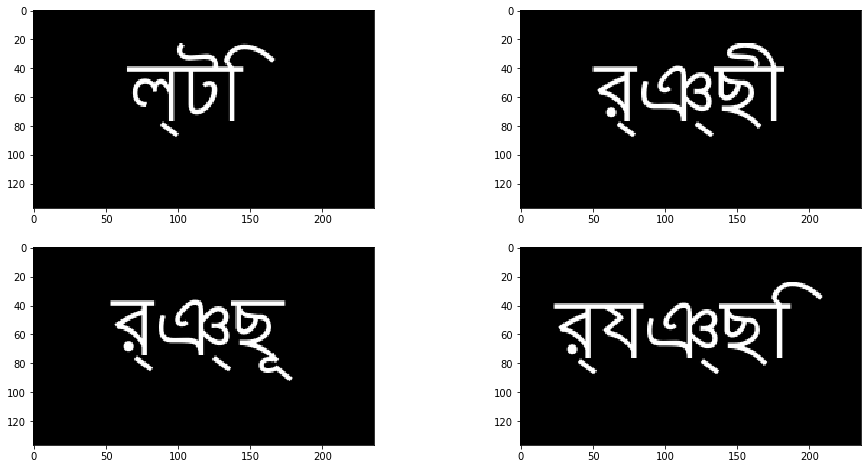

In [288]:
a_1 = generate_from_components(g_i=127, v_i=2, c_i=0)
a_2 = generate_from_components(g_i=51, v_i=3, c_i=2)
a_3 = generate_from_components(g_i=51, v_i=5, c_i=2)
a_4 = generate_from_components(g_i=51, v_i=2, c_i=3)
f, ax = plt.subplots(2, 2, figsize=(16, 8))
ax = ax.flatten()

print(a_1)
print(a_2)
print(a_3)
print(a_4)
ax[0].imshow(image_from_char(a_1), cmap='Greys')
ax[1].imshow(image_from_char(a_2), cmap='Greys')
ax[2].imshow(image_from_char(a_3), cmap='Greys')
ax[3].imshow(image_from_char(a_4), cmap='Greys')


In [ ]:
ল্টি

In [224]:

g_v = graphemes_df.iloc[127]['component']
v_v = vowel_df.iloc[2]['component']
c_v = consonant_df.iloc[0]['component']

In [225]:
print(g_v+v_v+c_v)
print(g_v+c_v+v_v)
print(v_v+g_v+c_v)
print(c_v+g_v+v_v)
print(c_v+v_v+g_v)
print(v_v+c_v+g_v)


ল্টি0
ল্ট0ি
িল্ট0
0ল্টি
0িল্ট
ি0ল্ট


In [175]:
c_v_2 = consonant_df.iloc[4]['component']

In [183]:
g_v+c_v_2+c_v

'ঘ্যর্য'

In [174]:
g_v

'ঘ'

In [ ]:
Train_200839